# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime as datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # I used the following Stack Overflow article to help me deal with cities with spaces in them.  Others suggested using a "_" sign instead
    # of a space, or removing the space altogether, but it seems like an plus sign is the best way to go:
    # Almazini, Marco Santarossa, (1963, March 1). Get the weather for cities with names that contain spaces using Openweathermap. Stack Overflow. 
    # https://stackoverflow.com/questions/38872376/get-the-weather-for-cities-with-names-that-contain-spaces-using-openweathermap 
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
     
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
         # Note: date is pulled in unix, UTC
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
       print("City not found. Skipping...")
       pass
   
    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | basmakci
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | baukau
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | kezmarok
Processing Record 7 of Set 1 | keflavik
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | mandal
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | carutapera
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | las vegas
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | shache
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.05,81,94,14.85,TF,1686488364
1,basmakci,37.8972,30.0117,17.05,58,58,3.52,TR,1686488364
2,adamstown,-25.0660,-130.1015,20.67,62,76,6.97,PN,1686488124
3,baukau,51.5526,7.2042,31.83,37,76,2.68,DE,1686488364
4,olonkinbyen,70.9221,-8.7187,2.24,84,100,11.27,SJ,1686488364


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.05,81,94,14.85,TF,1686488364
1,basmakci,37.8972,30.0117,17.05,58,58,3.52,TR,1686488364
2,adamstown,-25.0660,-130.1015,20.67,62,76,6.97,PN,1686488124
3,baukau,51.5526,7.2042,31.83,37,76,2.68,DE,1686488364
4,olonkinbyen,70.9221,-8.7187,2.24,84,100,11.27,SJ,1686488364


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

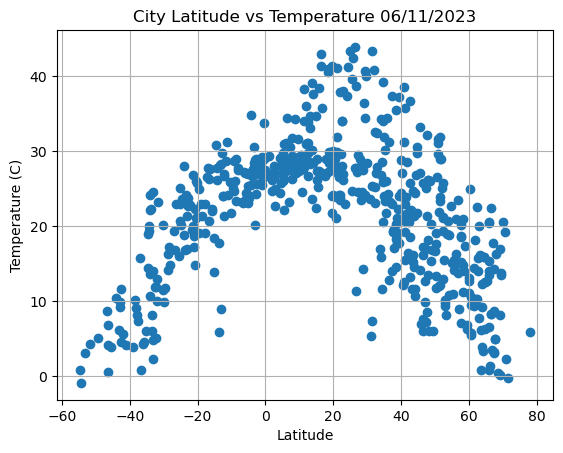

In [30]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
# I used the following source to convert the date:
# Almazini&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; , Marco Santarossa, 5. (1963, March 1). Get the weather for cities with names that contain spaces using Openweathermap. Stack Overflow. https://stackoverflow.com/questions/38872376/get-the-weather-for-cities-with-names-that-contain-spaces-using-openweathermap  
city_date = datetime.date.fromtimestamp(city_data_df["Date"][0])
city_date = city_date.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs Temperature {city_date}")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

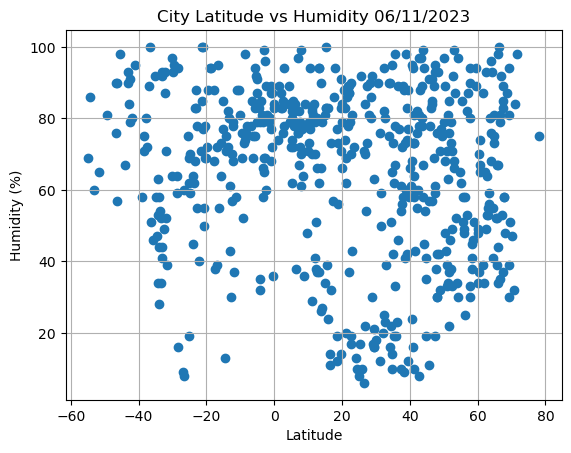

In [31]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# I used the following source to convert the date:
# Almazini&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; , Marco Santarossa, 5. (1963, March 1). Get the weather for cities with names that contain spaces using Openweathermap. Stack Overflow. https://stackoverflow.com/questions/38872376/get-the-weather-for-cities-with-names-that-contain-spaces-using-openweathermap  
city_date = datetime.date.fromtimestamp(city_data_df["Date"][0])
city_date = city_date.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs Humidity {city_date}")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

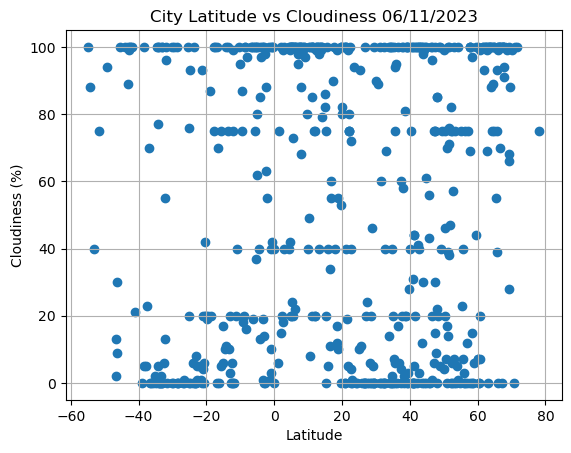

In [32]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# I used the following source to convert the date:
# Almazini&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; , Marco Santarossa, 5. (1963, March 1). Get the weather for cities with names that contain spaces using Openweathermap. Stack Overflow. https://stackoverflow.com/questions/38872376/get-the-weather-for-cities-with-names-that-contain-spaces-using-openweathermap  
city_date = datetime.date.fromtimestamp(city_data_df["Date"][0])
city_date = city_date.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs Cloudiness {city_date}")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

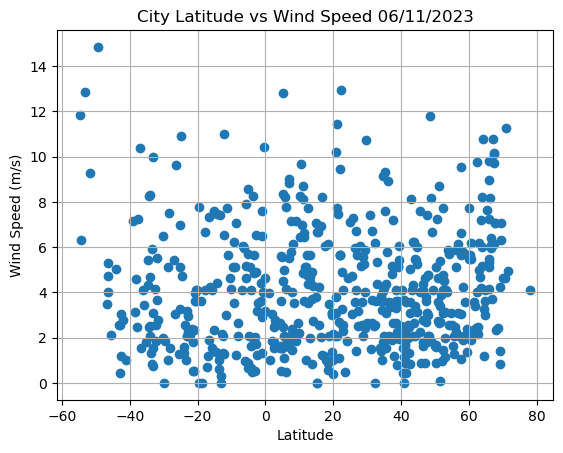

In [33]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# I used the following source to convert the date:
# Almazini&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; , Marco Santarossa, 5. (1963, March 1). Get the weather for cities with names that contain spaces using Openweathermap. Stack Overflow. https://stackoverflow.com/questions/38872376/get-the-weather-for-cities-with-names-that-contain-spaces-using-openweathermap  
city_date = datetime.date.fromtimestamp(city_data_df["Date"][0])
city_date = city_date.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs Wind Speed {city_date}")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linearregression(x_values, y_values, x_label, y_label, x_pos, y_pos, title):
    # Run the linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Get the regression values
    regress_values = x_values * slope + intercept
    # Find the best fit line
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # Create the scatterplot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    # Add x-label
    plt.xlabel(x_label)
    # Add y-label
    plt.ylabel(y_label)
    plt.title(title)
    # Add line of best fit equation to the graph
    plt.annotate(line_eq,(x_pos,y_pos),fontsize=15,color="red")
    # Find r-squared value
    print(f"The r-value is: {rvalue**2}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,basmakci,37.8972,30.0117,17.05,58,58,3.52,TR,1686488364
3,baukau,51.5526,7.2042,31.83,37,76,2.68,DE,1686488364
4,olonkinbyen,70.9221,-8.7187,2.24,84,100,11.27,SJ,1686488364
5,kezmarok,49.1357,20.4335,16.81,77,40,6.69,SK,1686488365
6,keflavik,64.0049,-22.5624,9.24,76,100,8.23,IS,1686488365


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.05,81,94,14.85,TF,1686488364
2,adamstown,-25.0660,-130.1015,20.67,62,76,6.97,PN,1686488124
9,grytviken,-54.2811,-36.5092,-0.91,86,88,6.33,GS,1686488365
10,carutapera,-1.1950,-46.0200,27.90,80,1,3.60,BR,1686488365
11,ushuaia,-54.8000,-68.3000,0.81,69,100,11.83,AR,1686488366


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4649683762956042


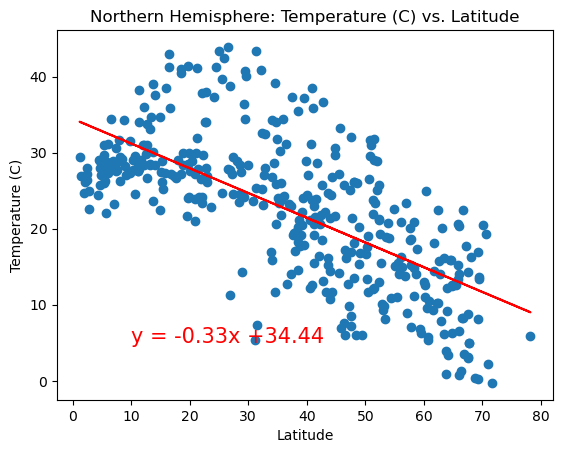

In [15]:
# Linear regression on Northern Hemisphere
linearregression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Temperature (C)", 
                 10, 5, "Northern Hemisphere: Temperature (C) vs. Latitude")

The r-value is: 0.6997519346722293


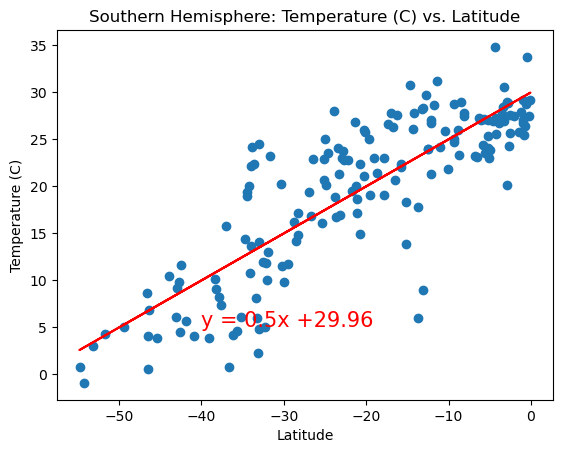

In [16]:
# Linear regression on Southern Hemisphere
linearregression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Temperature (C)", -40, 5, 
                 "Southern Hemisphere: Temperature (C) vs. Latitude")

For the latitude and temperature, we can see that there is a strong linear correlation (positive in the southern hemisphere and negative in the northern hemisphere). The r-squared numbers close to one indicates that the linear correlation is strong, meaning that as you get closer to a latitude of zero degrees (closer to the equator), the temperature tends to rise, and as you move from the latitude of zero (further from the equator), temperatures tend to fall linearly.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.009291552965030323


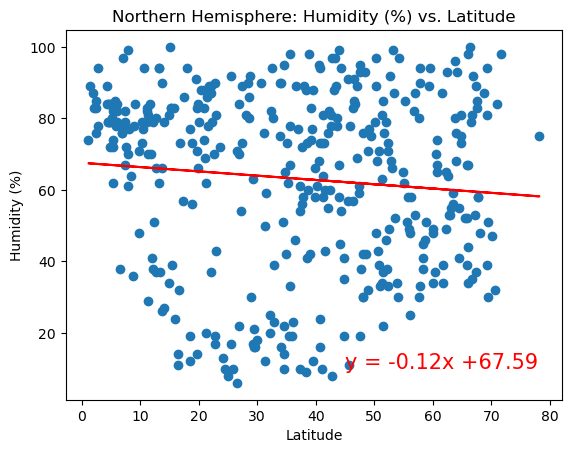

In [17]:
# Northern Hemisphere
linearregression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)",  45, 10, 
                 "Northern Hemisphere: Humidity (%) vs. Latitude")

The r-value is: 0.0066685883142081365


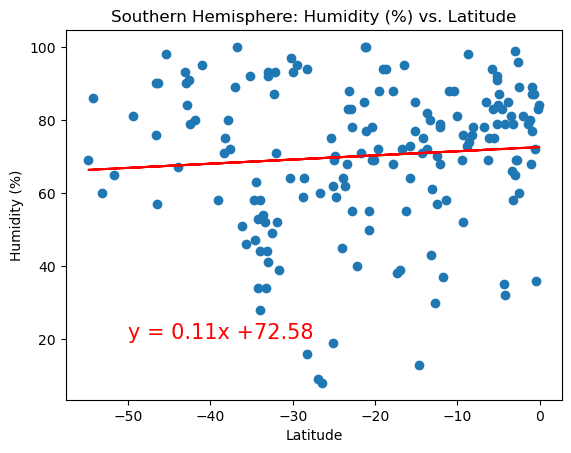

In [18]:
# Southern Hemisphere
linearregression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", -50, 20, 
                 "Southern Hemisphere: Humidity (%) vs. Latitude")


The r-squared value for both the northern and southern hemisphere are low, indicating that there is likely no linear correlation between humidity and latitude. We can see the regression line is nearly horizontal in both northern and southern hemispheres, indicating that there is likely no strong relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0015938828708367907


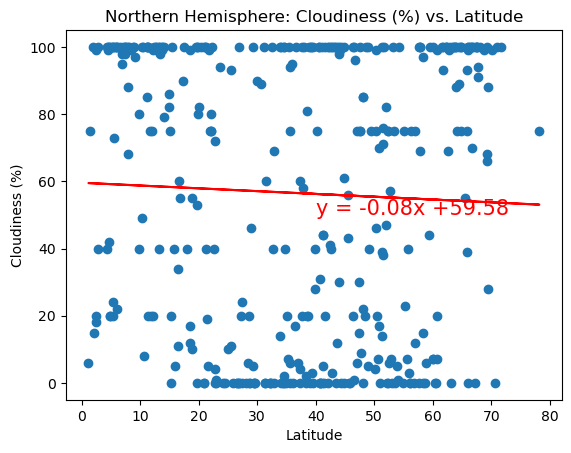

In [19]:
# Northern Hemisphere
linearregression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)",  40, 50, 
                 "Northern Hemisphere: Cloudiness (%) vs. Latitude")

The r-value is: 0.005691258704813582


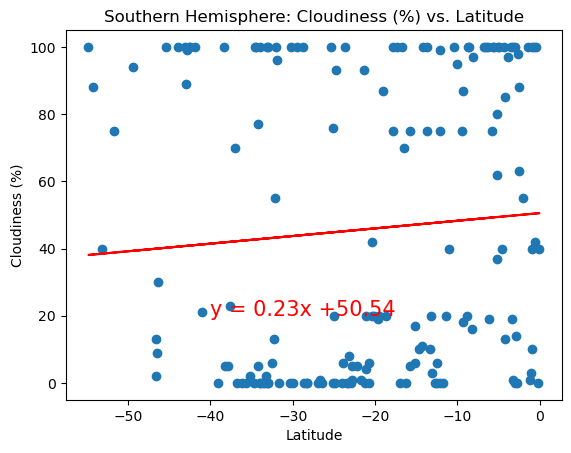

In [20]:
# Southern Hemisphere
linearregression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)",  -40, 20, 
                 "Southern Hemisphere: Cloudiness (%) vs. Latitude")

There is a very low r-squared value between cloudiness and latitude, indicating that there is likely no linear correlation between the two variables. You likely cannot predict cloudiness from the latitude of a location with certainty.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.007519174843306259


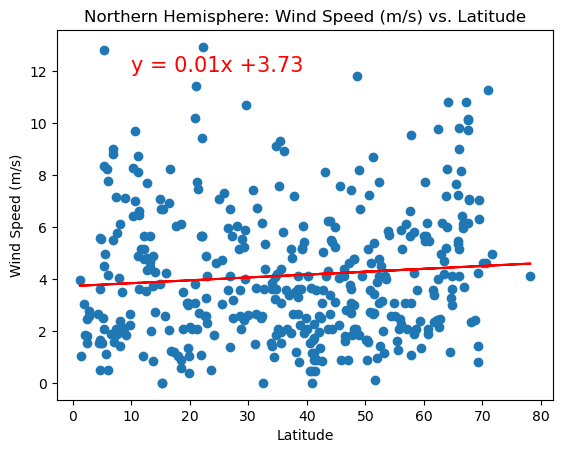

In [21]:
# Northern Hemisphere
linearregression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)",  10, 12, 
                 "Northern Hemisphere: Wind Speed (m/s) vs. Latitude")

The r-value is: 0.016514475976722988


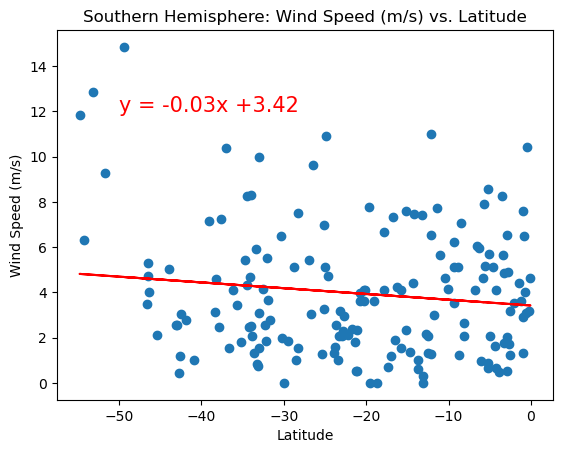

In [22]:
# Southern Hemisphere
linearregression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)",  -50, 12, 
                 "Southern Hemisphere: Wind Speed (m/s) vs. Latitude")

There are low r-squared values for both the northern and southern hemisphere for wind speed and latitude, indicating that there is no linear correlation between the two variables. We cannot say with certainty that we can predict wind speed from the latitude of a location.